# MNIST Hand Written Numbers Detection

Test demo here: https://jonneokkonen.com/HandWrittenNumbersDetection/

Read Paper here: https://jonneokkonen.com/docs/tietorakenteet_ja_algoritmit_teko%C3%A4ly_ja_koneoppiminen.pdf

Demo source: https://github.com/JonneOkkonen/HandWrittenNumbersDetection

Tensorflow Version: 2.3.0
Train images: (60000, 28, 28)
Train labels: 60000
Test images: (10000, 28, 28)
Test labels: 10000


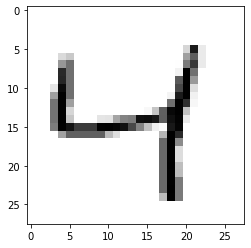

In [1]:
# -*- coding: utf-8 -*-
"""
Created on 5.12.2019

@author: Jonne Okkonen
"""

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras librarys
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print("Tensorflow Version: " + str(tf.__version__))

# Load MNIST Data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

class_names = ['0','1','2','3','4','5','6','7','8','9']

print("Train images: " + str(X_train.shape))
print("Train labels: " + str(len(y_train)))

print("Test images: " + str(X_test.shape))
print("Test labels: " + str(len(y_test)))

plt.imshow(X_train[2], cmap='Greys')

In [2]:
# Preprosessing
# Scale 0 to 255 RGB values to range 0 to 1 for training and testing images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Create Network Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
model.fit(X_train, y_train, epochs = 5, batch_size = 5)

# Test 10 000 number
print("\nResults:")
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/5
12000/12000 [==============================] - 9s 766us/step - loss: 0.2029 - accuracy: 0.9401
Epoch 2/5
12000/12000 [==============================] - 9s 754us/step - loss: 0.0950 - accuracy: 0.9704
Epoch 3/5
12000/12000 [==============================] - 9s 756us/step - loss: 0.0674 - accuracy: 0.9790
Epoch 4/5
12000/12000 [==============================] - 9s 764us/step - loss: 0.0522 - accuracy: 0.9836
Epoch 5/5
12000/12000 [==============================] - 9s 758us/step - loss: 0.0433 - accuracy: 0.9863

Results:
313/313 [==============================] - 0s 698us/step - loss: 0.0873 - accuracy: 0.9782

Test accuracy: 0.9782000184059143
